## Middle Fixation analysis (compressed fixations)

## Load fixation and trial information 

In [23]:
data_fix_1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PF2019/Output/fixation_PFA_Collapsed_AllConditions_33.csv') 
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/PF2019/Data/DataPerceptualFramingNotebook_v1.csv') 

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
Number of participants: 33


In [24]:
for i in [31]:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
    data_fix_1 = data_fix_1[(data_fix_1.parcode != i)]

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
Number of participants: 32


In [25]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})


In [26]:
par_list = data_fix_1["parcode"].unique()
parInfoList = data_exp1["Part"].unique()
print('Participants names')
print(par_list)
print(parInfoList)

Participants names
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 32 33]


In [27]:
data_fix_1.head()

,parcode,trial,fix_item,fix_time,rt,block
0,1,40,0,232.0,4261.735,LESS
1,1,40,1,1008.0,4261.735,LESS
2,1,40,2,956.0,4261.735,LESS
3,1,40,1,1030.0,4261.735,LESS
4,1,40,2,642.0,4261.735,LESS


## Add missing zScored values

In [28]:
data_exp1["zRVal"] = z_score1(data_exp1,'Part',"RVal")
data_exp1["zLVal"] = z_score1(data_exp1,'Part',"LVal")

data_exp1["zGSF"] = z_score1(data_exp1,'Part',"GSF")
data_exp1["zDDT"] = z_score1(data_exp1,'Part',"DDT")
data_exp1["AbsDDT"] = abs(data_exp1["DDT"])
data_exp1["zAbsDDT"] = z_score1(data_exp1,'Part',"AbsDDT")

data_exp1["TotVal"] = data_exp1['LVal']+ data_exp1['RVal']
data_exp1["zTotVal"] = z_score1(data_exp1,'Part',"TotVal")

data_exp1["ChosenVal"] = data_exp1['RVal']*data_exp1['Choice']+ data_exp1['LVal']*(1-data_exp1['Choice'])
data_exp1["UnchosenVal"] = data_exp1['LVal']*data_exp1['Choice']+ data_exp1['RVal']*(1-data_exp1['Choice'])
data_exp1["zChosenVal"] = z_score1(data_exp1,'Part',"ChosenVal")
data_exp1["zUnchosenVal"] = z_score1(data_exp1,'Part',"UnchosenVal")


## Change the name of the BlockCond

In [29]:
# Change so everything is equal
data_exp1 = data_exp1.replace('NEXTLESS', 'MORE')
data_exp1 = data_exp1.replace('NEXTMORE', 'LESS')
data_exp1['BlockCond'].unique()

# Change so everything is equal
data_exp1 = data_exp1.replace('MORE', 1)
data_exp1 = data_exp1.replace('LESS', 2)
data_exp1['BlockCond'].unique()

array([2, 1])

## Add correct variable

In [30]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.BlockCond[i] == 1:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] < data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] > data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.BlockCond[i] == 2:
        if (data_exp1.Choice[i] == 1 and (data_exp1.LVal[i] > data_exp1.RVal[i])) or (data_exp1.Choice[i] == 0 and (data_exp1.LVal[i] < data_exp1.RVal[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["Correct"] = Correct

## Add column with the item with higher value for each trial


In [31]:
data_exp1.columns

Index(['Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LVal', 'RVal', 'Choice',
       'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT', 'LDwellTime', 'RDwellTime',
       'GSF', 'LastFixat', 'DVal', 'zDVal', 'AbsDVal', 'zAbsDVal', 'zConf',
       'zRT', 'TotVal', 'ChosenVal', 'UnchosenVal', 'Correct', 'zTotVal',
       'zChosenVal', 'zUnchosenVal', 'zGSF', 'zDDT', 'zAbsDDT', 'zValR',
       'zValL', 'ConfSplit', 'GSFSplit', 'DDTSplit', 'BaseCode', 'High', 'Low',
       'zRVal', 'zLVal', 'AbsDDT'],
      dtype='object')

In [32]:
data_exp1["zHighVal"] = data_exp1[["zRVal", "zLVal"]].max(axis=1)
data_exp1["zLowVal"] = data_exp1[["zRVal", "zLVal"]].min(axis=1)

data_exp1['HighValPos'] = np.where((data_exp1['zHighVal'] == data_exp1['zLVal']) , 1, 2)
data_exp1['LowValPos'] = np.where((data_exp1['zLowVal'] == data_exp1['zLVal']) , 1, 2)

## Extract fixations info

In [33]:
# Areas defined in DataViewer Reports are 
## 1 : Left
## 2 : Right
## 3 : Symbol for block
## 4 : Center space
## Any other area will be indicated as empty


fixations_info = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    for j in range(0,len(trial_list)):
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == trial_list[j]] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_fix_list = data_fix1_trial['fix_item'].values
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        
        
        trial_fix_count = np.bincount(trial_fix_list) # the count is in order [0,1,2,3]
        mostPopularFix =  np.argmax(trial_fix_count)
        numMostPopularFix = trial_fix_count[mostPopularFix]  

        if len(trial_fix_list)>1:
            if trial_fix_list[0] == 3 or trial_fix_list[0] == 0:# if we start with central fixation, we check the next fixation as initial
                first_fix_id = trial_fix_list[1]
                first_fix_time = data_fix1_trial['fix_time'].values[1]
            else:
                first_fix_id = trial_fix_list[0]
                first_fix_time =data_fix1_trial['fix_time'].values[0]
        else:
            first_fix_id = np.nan
            first_fix_time = np.nan
            
    
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        last_fix_time = data_fix1_trial['fix_time'].values[len(data_fix1_trial)-1]
        
        total_time = data_fix1_trial['fix_time'].sum()        
        
        
        # second fixation info
        if len(data_fix1_trial)>2:
            if data_fix1_trial.iloc[0].fix_item == 3 or data_fix1_trial.iloc[0].fix_item == 0: # if we start with a fixation at the middle or outside (the latter shouldn't be but we add it just in case)
                if  data_fix1_trial.iloc[2].fix_item == 1 or data_fix1_trial.iloc[2].fix_item == 2:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[2].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[3].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[3].fix_item
            else: # if we start with a fixation not to the middle
                if  data_fix1_trial.iloc[1].fix_item != 3 or data_fix1_trial.iloc[1].fix_item != 0:
                    second_fix_time = data_fix1_trial.iloc[1].fix_time # fixation number 2
                    second_fix_id = data_fix1_trial.iloc[1].fix_item
                else:
                    second_fix_time = data_fix1_trial.iloc[2].fix_time # fixation number 2 displaced because we have a zero in that position
                    second_fix_id = data_fix1_trial.iloc[2].fix_item

        else:
            second_fix_time = np.nan
            second_fix_id = np.nan
        
        # Check identity of first/last fixation and determine the value 
        
        if first_fix_id == 1: 
            firstFixValue = float(data_info1_trial['LVal'].values)
        elif first_fix_id == 2: 
            firstFixValue = float(data_info1_trial['RVal'].values)
        else:
            firstFixValue = np.nan

        if last_fix_id == 1: 
            lastFixValue = float(data_info1_trial['LVal'].values)
        elif last_fix_id == 2: 
            lastFixValue = float(data_info1_trial['RVal'].values)
        else:
            lastFixValue = np.nan
        
        #Characterize medium fixations
        # Is there any medium fixations?
        fixatNum = len(data_fix1_trial)
        
        middleFixNum = len(data_fix1_trial) - 2
        # Generate medium    
        if middleFixNum > 2 :
            trialFixListMedium = np.delete(trial_fix_list, -1) # delete last element of the fixation series
            trialFixListMedium = np.delete(trialFixListMedium, 0) # delete first element of the fixation series
            trialFixListMedium = np.bincount(trialFixListMedium)
            mostPopularFixMed = np.argmax(trialFixListMedium)
            numMostPopularFixMed = trialFixListMedium[mostPopularFixMed]  
        else:
            trialFixListMedium = [] # delete last element of the fixation series
            trialFixListMedium = np.nan
            mostPopularFixMed = np.nan
            numMostPopularFixMed = np.nan
        
        
        if middleFixNum > 2 :
            middleFixTotTime =  (data_fix1_trial['fix_time'].sum() - last_fix_time - first_fix_time)       
            middleFixTimeAvg = middleFixTotTime / middleFixNum
           # get medium fixations times
            data_fix1_trial = data_fix1_trial.iloc[0:len(data_fix1_trial)-1] # drop first and last fixations (since it starts with center fixation we drop the second too) 
            middlefix_ltime = np.sum(data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 1].fix_time.values)
            middlefix_rtime = np.sum(data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 2].fix_time.values)
            middlefix_avgltime = np.nanmean(data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 1].fix_time.values)
            middlefix_avgrtime = np.nanmean(data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 2].fix_time.values)
            middlefix_ddt = middlefix_rtime - middlefix_ltime
     
        else:
            middleFixTotTime = 0
            middleFixTimeAvg = 0
            middlefix_ltime = np.nan
            middlefix_rtime = np.nan
            middlefix_avgltime = np.nan
            middlefix_avgrtime = np.nan
            middlefix_ddt = np.nan

        
        fixations_info.append([i,j,first_fix_id , first_fix_time, last_fix_id,last_fix_time, 
                               firstFixValue, lastFixValue, 
                               fixatNum,middleFixNum,mostPopularFix, numMostPopularFix, mostPopularFixMed, numMostPopularFixMed,
                               middleFixTotTime,middleFixTimeAvg,total_time,middlefix_ltime,middlefix_rtime,middlefix_ddt,
                               middlefix_avgltime,middlefix_avgrtime,
                              second_fix_time,second_fix_id]) 



/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: Mean of empty slice


In [34]:
fixation_file = pd.DataFrame(fixations_info,columns=['Part','Trial', '1stFixation', '1stFixationTime', 'LastFixation','LastFixationTime', 
                                                     'firstFixValue','lastFixValue', 
                               'fixatNum','middleFixNum','mostPopularFix', 'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
                               'middleFixTime','middleFixTimeAvg','TotalTime','midfix_Ltime','midfix_Rtime','midfix_ddt',
                                                    'midfix_avgLtime','midfix_avgRtime','second_fix_time','second_fix_id'])

fixation_file = fixation_file.drop(["Part", "Trial"], axis=1)


In [35]:
fixation_file.head()

,1stFixation,1stFixationTime,LastFixation,LastFixationTime,firstFixValue,lastFixValue,fixatNum,middleFixNum,mostPopularFix,numMostPopularFix,...,middleFixTime,middleFixTimeAvg,TotalTime,midfix_Ltime,midfix_Rtime,midfix_ddt,midfix_avgLtime,midfix_avgRtime,second_fix_time,second_fix_id
0,1.0,1008.0,1,393.735,110.0,110.0,6,4,1,3,...,2860.0,715.0,4261.735,2038.0,1598.0,-440.0,1019.0,799.0,956.0,2.0
1,1.0,706.0,2,912.258,47.0,50.0,5,3,1,2,...,1941.0,647.0,3559.258,1496.0,640.0,-856.0,748.0,640.0,640.0,2.0
2,1.0,1030.0,2,702.464,50.0,44.0,6,4,0,2,...,2022.0,505.5,3754.464,1414.0,764.0,-650.0,707.0,764.0,764.0,2.0
3,1.0,1072.0,1,337.751,57.0,57.0,4,2,1,2,...,0.0,0.0,2431.751,NaN,NaN,NaN,NaN,NaN,796.0,2.0
4,1.0,1232.0,1,310.342,42.0,42.0,4,2,1,2,...,0.0,0.0,2199.342,NaN,NaN,NaN,NaN,NaN,654.0,2.0


In [36]:
data_exp11 = pd.DataFrame()
data_exp1 = data_exp1.reset_index()
fixation_file =fixation_file.reset_index()
frames_list = [data_exp1,fixation_file]
data_exp11 = pd.concat(frames_list, axis = 1)
#fixation_file.to_csv("Output/DataAllFixINcluTEST31.csv",index = False)
# z-score the middle fixations relevant variables

### Add  % time looked at each item - for middle fixations

In [37]:
data_exp11['LGazePC'] = (data_exp11['midfix_Ltime']) / (data_exp11['midfix_Rtime'] + data_exp11['midfix_Ltime'])
data_exp11['RGazePC'] = (data_exp11['midfix_Rtime']) / (data_exp11['midfix_Rtime'] + data_exp11['midfix_Ltime'])

In [38]:
data_exp11['HValGazePC'] = ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['LGazePC'] + ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['RGazePC']
data_exp11['LValGazePC'] = ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['LGazePC'] + ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['RGazePC']

In [39]:
data_exp11['zLGazePC'] = z_score1(data_exp11,'Part','LGazePC')
data_exp11['zRGazePC'] = z_score1(data_exp11,'Part','RGazePC')

In [40]:
data_exp11['zHValGazePC'] = z_score1(data_exp11,'Part','HValGazePC')
data_exp11['zLValGazePC'] = z_score1(data_exp11,'Part','LValGazePC')  

### Add % time looked at chosen items

In [41]:
data_exp11['ChosenGazePC'] = ( data_exp11['Choice'] == 0) * data_exp11['LGazePC'] + ( data_exp11['Choice'] == 1) * data_exp11['LGazePC']
data_exp11['UnchosenGazePC'] = ( data_exp11['Choice'] == 1) * data_exp11['LGazePC'] + ( data_exp11['Choice'] == 0)  * data_exp11['RGazePC']

data_exp11['zChosenGazePC'] = z_score1(data_exp11,'Part','ChosenGazePC')
data_exp11['zUnchosenGazePC'] = z_score1(data_exp11,'Part','UnchosenGazePC')  

###  z-score middle fixations ddt

In [42]:
data_exp11["zMidfix_ddt"] = z_score1(data_exp11,'Part',"midfix_ddt")
data_exp11["zmiddleFixTimeAvg"] = z_score1(data_exp11,'Part',"middleFixTimeAvg")

### mean durations of middle fixations to High and Low Value Items

In [43]:
data_exp11['HValAvgGazePC'] = ( data_exp11['LVal'] > data_exp11['RVal'] ) * data_exp11['midfix_avgLtime'] + ( data_exp11['LVal'] <= data_exp11['RVal'] ) * data_exp11['midfix_avgRtime']
data_exp11['LValAvgGazePC'] = ( data_exp11['LVal'] < data_exp11['RVal'] ) * data_exp11['midfix_avgLtime'] + ( data_exp11['LVal'] >= data_exp11['RVal'] ) * data_exp11['midfix_avgRtime']

### second fixations to high or low number

In [67]:
# considering  'second_fix_id' is 1 for left and 2 for right
high_fix2 = [] # create vector to indicate if the 2nd fixation is going to the high or low value
for i in range(len(data_exp11)):
    left_val = data_exp11.iloc[i].LVal
    right_val = data_exp11.iloc[i].RVal
    if left_val >= right_val: # if left item is higher value
        if data_exp11.iloc[i].second_fix_id == 1 :# if fixation is to the highvalue
            high_fix2.append(1)
        else:
            high_fix2.append(0)
    #elif left_val < right_val: # if right item is higher value
    else: # if item to the right has higher value
        if data_exp11.iloc[i].second_fix_id == 2 :# if fixation is to the highvalue
            high_fix2.append(1)
        else:
            high_fix2.append(0)
    if i%500 == 0 :
        print('500 in')
            
data_exp11['SecondFix2High'] =  high_fix2


500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in
500 in


### separate dataframes per condition (1: most; 2: fewest)

In [44]:
data_expL = data_exp11.loc[data_exp11['BlockCond'] == 1] 
data_expD = data_exp11.loc[data_exp11['BlockCond'] == 2] 

# Allocation of middle fixations - percent time observing items

In [45]:
def SE_calc (a):
    b = np.std(a)/np.sqrt(len(a))
    return b

In [46]:
LikeHighValGaze  =  []
LikeLowValGaze  =  []
DislikeHighValGaze  =  []
DislikeLowValGaze  =  []

LikeChoGaze  =  []
LikeUnchoGaze  =  []
DislikeChoGaze  =  []
DislikeUnchoGaze  =  []

for i in data_expL.Part.unique():
    
    Lik_MeanHValGazePC = data_expL.loc[(data_expL['Part'] == i)].HValGazePC.mean()
    Dlik_MeanHValGazePC = data_expD.loc[(data_expD['Part'] == i)].HValGazePC.mean()
    
    Lik_MeanLValGazePC = data_expL.loc[(data_expL['Part'] == i)].LValGazePC.mean()
    Dlik_MeanLValGazePC = data_expD.loc[(data_expD['Part'] == i)].LValGazePC.mean()
    
    LikeHighValGaze.append(Lik_MeanHValGazePC)
    LikeLowValGaze.append(Lik_MeanLValGazePC)
    DislikeHighValGaze.append(Dlik_MeanHValGazePC)
    DislikeLowValGaze.append(Dlik_MeanLValGazePC)
    
    
    Lik_MeanChoGazePC = data_expL.loc[(data_expL['Part'] == i)].ChosenGazePC.mean()
    Dlik_MeanChoGazePC = data_expD.loc[(data_expD['Part'] == i)].ChosenGazePC.mean()
    
    Lik_MeanUnchoGazePC = data_expL.loc[(data_expL['Part'] == i)].UnchosenGazePC.mean()
    Dlik_MeanUnchoGazePC = data_expD.loc[(data_expD['Part'] == i)].UnchosenGazePC.mean()
    
    LikeChoGaze.append(Lik_MeanChoGazePC)
    LikeUnchoGaze.append(Lik_MeanUnchoGazePC)
    DislikeChoGaze.append(Dlik_MeanChoGazePC)
    DislikeUnchoGaze.append(Dlik_MeanUnchoGazePC)
    
    
error_LikeHighValGaze  = SE_calc(LikeHighValGaze)
error_LikeLowValGaze  =  SE_calc(LikeLowValGaze)
error_DislikeHighValGaze  = SE_calc(DislikeHighValGaze)
error_DislikeLowValGaze  =  SE_calc(DislikeLowValGaze)

avg_LikeHighValGaze  = np.mean(LikeHighValGaze)
avg_LikeLowValGaze  =   np.mean(LikeLowValGaze)
avg_DislikeHighValGaze  =  np.mean(DislikeHighValGaze)
avg_DislikeLowValGaze  =   np.mean(DislikeLowValGaze)

error_LikeChoGaze  = SE_calc(LikeChoGaze)
error_LikeUnchoGaze  =  SE_calc(LikeUnchoGaze)
error_DislikeChoGaze  = SE_calc(DislikeChoGaze)
error_DislikeUnchoGaze  =  SE_calc(DislikeUnchoGaze)

avg_LikeChoGaze  = np.mean(LikeChoGaze)
avg_LikeUnchoGaze  =   np.mean(LikeUnchoGaze)
avg_DislikeChoGaze  =  np.mean(DislikeChoGaze)
avg_DislikeUnchoGaze =   np.mean(DislikeUnchoGaze)



In [47]:
# t-test
diff = avg_LikeHighValGaze - avg_DislikeHighValGaze
[s1, p1] = stats.ttest_rel(LikeHighValGaze,DislikeHighValGaze)
print (" Like High Val Gaze =  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ; Mean Dislike High Val Gaze =  "+ str(round(mean(avg_DislikeHighValGaze),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s1,2)) + " ; p-value =" + str(round(p1,2) ))

diff = avg_LikeLowValGaze - avg_DislikeLowValGaze
[s2, p2] = stats.ttest_rel(LikeLowValGaze,DislikeLowValGaze)
print (" Like High Val Gaze =  "+ str(round(mean(avg_LikeLowValGaze),2))+ " ; Mean Dislike High Val Gaze =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [Like - Dislike] =  " + str(round(diff,2)) +"; t =  " + str(round(s2,2)) + " ; p-value =" + str(round(p2,2) ))


diff = avg_LikeHighValGaze - avg_LikeLowValGaze
[s3, p3] = stats.ttest_rel(LikeHighValGaze,LikeLowValGaze)
print (" Like High=  "+ str(round(mean(avg_LikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_LikeLowValGaze),2))+"; [High - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s3,2)) + " ; p-value =" + str(round(p3,2) ))

diff = avg_DislikeHighValGaze - avg_DislikeLowValGaze
[s4, p4] = stats.ttest_rel(DislikeHighValGaze,DislikeLowValGaze)
print (" DisLike High=  "+ str(round(mean(avg_DislikeHighValGaze),2))+ " ;   Low  =  "+ str(round(mean(avg_DislikeLowValGaze),2))+"; [high - low] =  " + str(round(diff,2)) +"; t =  " + str(round(s4,2)) + " ; p-value =" + str(round(p4,2) ))



 Like High Val Gaze =  0.48 ; Mean Dislike High Val Gaze =  0.52; [Like - Dislike] =  -0.04; t =  -5.9 ; p-value =0.0
 Like High Val Gaze =  0.52 ; Mean Dislike High Val Gaze =  0.48; [Like - Dislike] =  0.04; t =  5.9 ; p-value =0.0
 Like High=  0.48 ;   Low  =  0.52; [High - low] =  -0.04; t =  -4.99 ; p-value =0.0
 DisLike High=  0.52 ;   Low  =  0.48; [high - low] =  0.04; t =  5.35 ; p-value =0.0


In [48]:
 
# Add asterisk
def add_star2(RT_like, RT_dislike, p,x1,x2):
    
    if p>0.05:
        print(' no significant results')
    else:    
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
    
        y_max = max([np.max(RT_like), np.max(RT_dislike)])
        y, h, col = y_max , y_max/50, 'k'
        plt.plot( [x1+0.8, x2-0.8], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

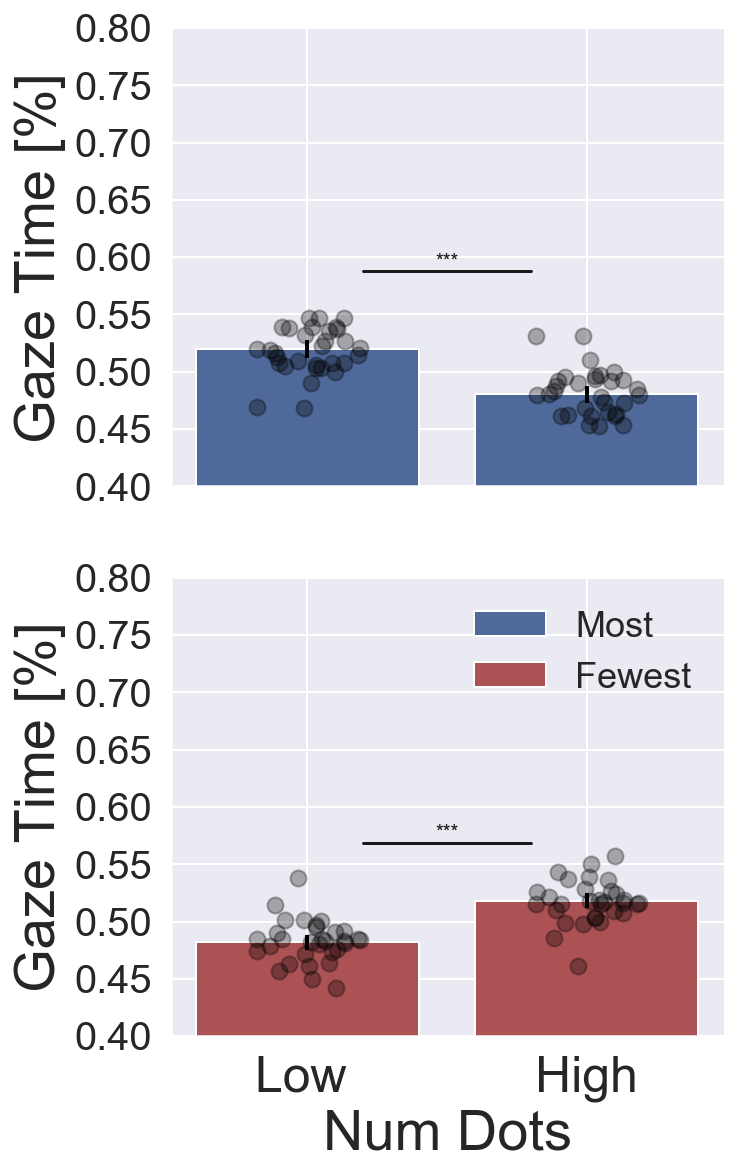

In [49]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])

add_star2(LikeLowValGaze,LikeHighValGaze, p3,1,2)
plt.yticks(fontsize=20)


ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(2, np.mean(LikeHighValGaze), width=0.8,color= '#4F6A9A',hatch=r'')
ax1.bar(1, np.mean(LikeLowValGaze), width=0.8,color= '#4F6A9A',hatch=r'')

ax2.bar(2, np.mean(DislikeHighValGaze), width=0.8,color='#AC5255',hatch=r'')
ax2.bar(1, np.mean(DislikeLowValGaze), width=0.8,color='#AC5255',hatch=r'')


# error
ax1.errorbar(2, np.mean(LikeHighValGaze), yerr=error_LikeHighValGaze*1.96, lw=2, color='#000000')
ax1.errorbar(1, np.mean(LikeLowValGaze), yerr=error_LikeLowValGaze*1.96, lw=2, color='#000000')

ax2.errorbar(2, np.mean(DislikeHighValGaze), yerr=error_DislikeHighValGaze*1.96, lw=2, color='#000000')
ax2.errorbar(1, np.mean(DislikeLowValGaze), yerr=error_DislikeLowValGaze*1.96, lw=2, color='#000000')
     
    
for i in range(1,len(LikeHighValGaze)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(2+jittr, LikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(1+jittr, LikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(2+jittr, DislikeHighValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax2.plot(1+jittr, DislikeLowValGaze[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('Gaze Time [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)
        
ax2.set_xticks([1,2])
ax2.set_xticklabels(["Low ","High"], rotation=0, fontsize=25)
ax2.set_ylabel('Gaze Time [%]', fontsize=28)
ax2.set_xlabel('Num Dots', fontsize=28)

ax1.set_ylim([0.4,0.80])
ax2.set_ylim([0.4,0.80])

plt.yticks(fontsize=20)


sns.despine()




add_star2(DislikeLowValGaze,DislikeHighValGaze, p4,1,2)


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_31.png'), dpi = 200 )

# Average fixation time for middle fixations

In [50]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    
    [s, p] = stats.ttest_rel(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ (low-high)= ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p) )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = 0, 1   
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)
        
# Add asterisk independent t-test
def add_star_ind(RT_like, RT_dislike):
    
    [s, p] = stats.ttest_ind(RT_like,RT_dislike,nan_policy = 'omit')
    print ('∆ = ' +str(np.nanmean(RT_like)-np.nanmean(RT_dislike))+ '; t =' + str(s) + "; p = " + str(p) )
    if p<0.05:
        if p<0.001:
            star_text = '***'
        elif p<0.01:
            star_text = '**'
        elif p<0.05:
            star_text = '*'
        x1, x2 = 0, 1   
        y_max = max([np.nanmax(RT_like), np.nanmax(RT_dislike)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

Most
∆ (low-high)= -29.184772194554625; t =-3.8442246397749438; p = 0.00012388859950574477
Fewest
∆ (low-high)= 57.233137561817784; t =7.278623298357747; p = 4.464520679249947e-13


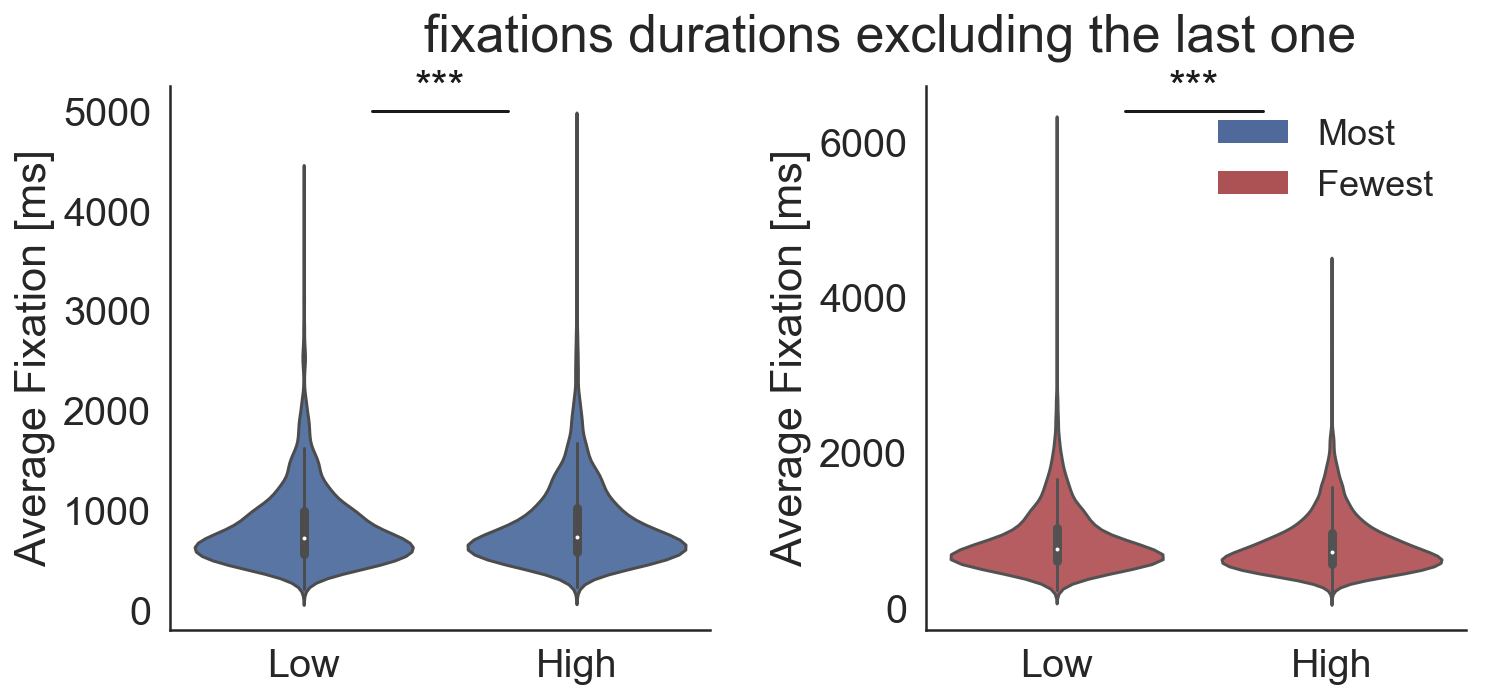

In [51]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('fixations durations excluding the last one')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [data_expL.LValAvgGazePC.values,
          data_expL.HValAvgGazePC.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Average Fixation [ms]')
plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star(data_expL.LValAvgGazePC.values.tolist(), data_expL.HValAvgGazePC.values.tolist())
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [data_expD.LValAvgGazePC.values,
          data_expD.HValAvgGazePC.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Average Fixation [ms]')
plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star(data_expD.LValAvgGazePC.values.tolist(), data_expD.HValAvgGazePC.values.tolist())

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


## Plot average duration of middle fixation vs last fixations

Most
∆ (low-high)= -183.3517788044046; t =-21.88620425655047; p = 3.688661578889568e-100
Fewest
∆ (low-high)= -151.9279174465965; t =-19.967625391882866; p = 1.782370937945447e-84


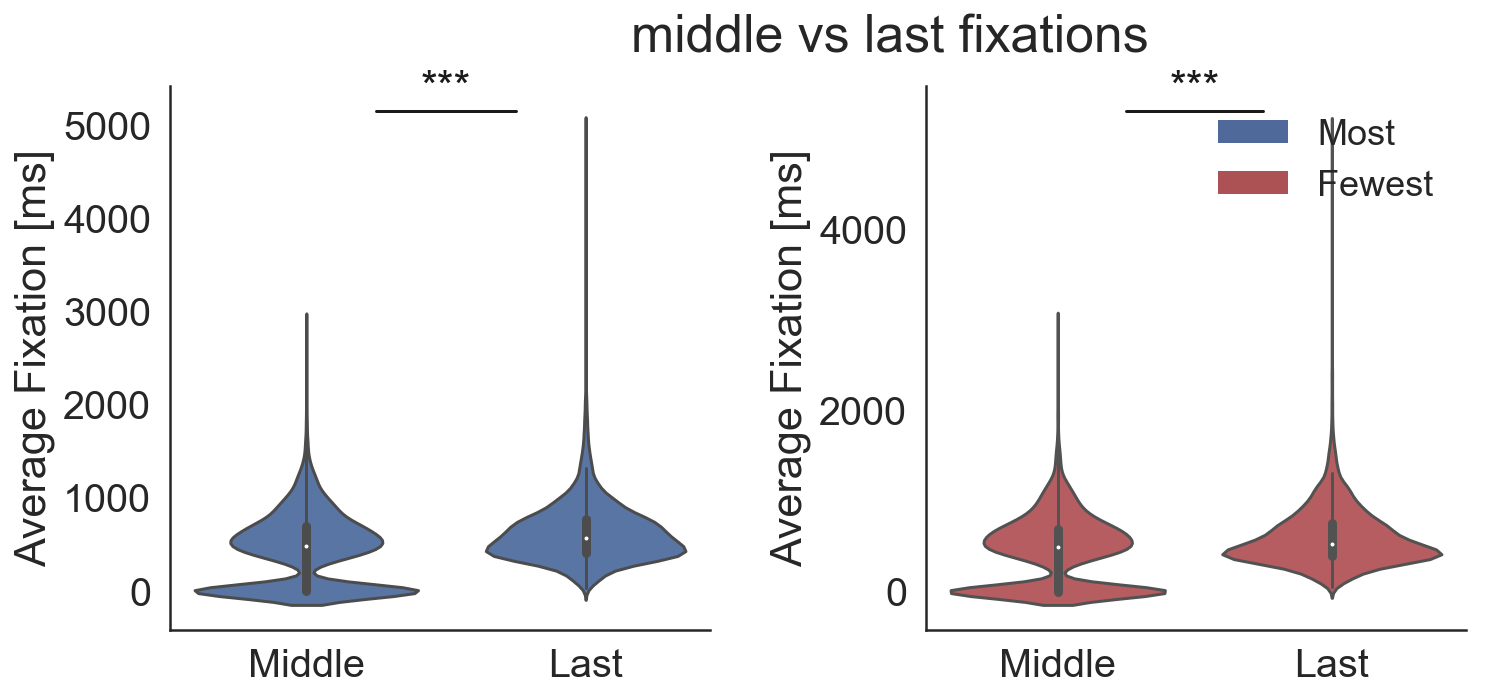

In [52]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('middle vs last fixations')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [data_expL.middleFixTimeAvg.values,
          data_expL.LastFixationTime.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Average Fixation [ms]')
plt.xticks([0, 1,], ['Middle', 'Last'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star(data_expL.middleFixTimeAvg.values.tolist(), data_expL.LastFixationTime.values.tolist())
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [data_expD.middleFixTimeAvg.values,
          data_expD.LastFixationTime.values]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='Average Fixation [ms]')
plt.xticks([0, 1,], ['Middle', 'Last'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star(data_expD.middleFixTimeAvg.values.tolist(), data_expD.LastFixationTime.values.tolist())

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


## 2nd fixations

In [53]:
mean_Lik_MeanHVal2Fix = []
mean_Dis_MeanHVal2Fix = []
for i in data_expL.Part.unique():
    
    Lik_MeanHVal2Fix = data_expL.loc[(data_expL['Part'] == i)].SecondFix2High.mean()
    Dis_MeanHVal2Fix = data_expD.loc[(data_expD['Part'] == i)].SecondFix2High.mean()
    
    mean_Lik_MeanHVal2Fix.append(Lik_MeanHVal2Fix)
    mean_Dis_MeanHVal2Fix.append(Dis_MeanHVal2Fix)
  

e_LikHVal2Fix  = SE_calc(mean_Lik_MeanHVal2Fix)
e_DisHVal2Fix  = SE_calc(mean_Dis_MeanHVal2Fix)

avg_LikHVal2Fix  = np.mean(mean_Lik_MeanHVal2Fix)
avg_DisHVal2Fix  = np.mean(mean_Dis_MeanHVal2Fix)

# extract times when 2nd fixation goes to high value or low value item
high_Lik_2fixTime = data_expL.loc[(data_expL['SecondFix2High'] == 1)].second_fix_time.values
low_Lik_2fixTime = data_expL.loc[(data_expL['SecondFix2High'] == 0)].second_fix_time.values

high_Dis_2fixTime = data_expD.loc[(data_expD['SecondFix2High'] == 1)].second_fix_time.values
low_Dis_2fixTime = data_expD.loc[(data_expD['SecondFix2High'] == 0)].second_fix_time.values

AttributeError: 'DataFrame' object has no attribute 'SecondFix2High'

∆ (low-high)= nan; t =nan; p = nan


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'e_LikHVal2Fix' is not defined

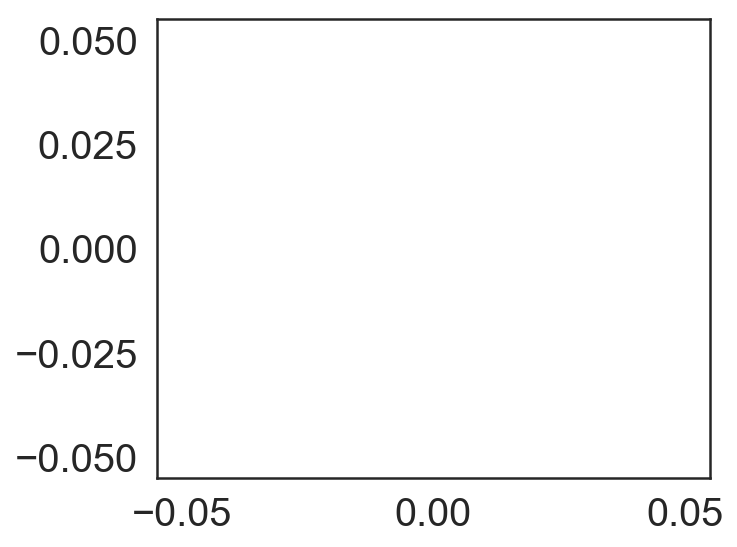

In [54]:
fig = plt.figure(figsize=[6,10])
gs = GridSpec(2,1,bottom=0.18,left=0.18,right=0.82)

ax1 = fig.add_subplot(gs[0,0])

add_star(mean_Lik_MeanHVal2Fix,mean_Dis_MeanHVal2Fix)
plt.yticks(fontsize=20)


#ax2 = fig.add_subplot(gs[1,0])

# bars
ax1.bar(1, np.mean(mean_Lik_MeanHVal2Fix), width=0.8,color= '#4F6A9A',hatch=r'')
ax1.bar(2, np.mean(mean_Dis_MeanHVal2Fix), width=0.8,color='#AC5255',hatch=r'')

# error
ax1.errorbar(1, np.mean(mean_Lik_MeanHVal2Fix), yerr=e_LikHVal2Fix*1.96, lw=2, color='#000000')
ax1.errorbar(2, np.mean(mean_Dis_MeanHVal2Fix), yerr=e_DisHVal2Fix*1.96, lw=2, color='#000000')

for i in range(1,len(mean_Lik_MeanHVal2Fix)):
        jittr = np.random.uniform(low=-0.2,high=0.2)
        ax1.plot(1+jittr, mean_Lik_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        ax1.plot(2+jittr, mean_Dis_MeanHVal2Fix[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        
ax1.set_xticks([1,2])
ax1.set_xticklabels([], rotation=0, fontsize=25)
ax1.set_ylabel('2nd Fix to High Value [%]', fontsize=28)
#ax1.set_xticklabels([], rotation=0, fontsize=25)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "lower right",frameon = False)
        

plt.yticks(fontsize=20)


sns.despine()


#fig.savefig(str('SavedFigures/BehavGazeMoreLess_31.png'), dpi = 200 )

Most


NameError: name 'low_Lik_2fixTime' is not defined

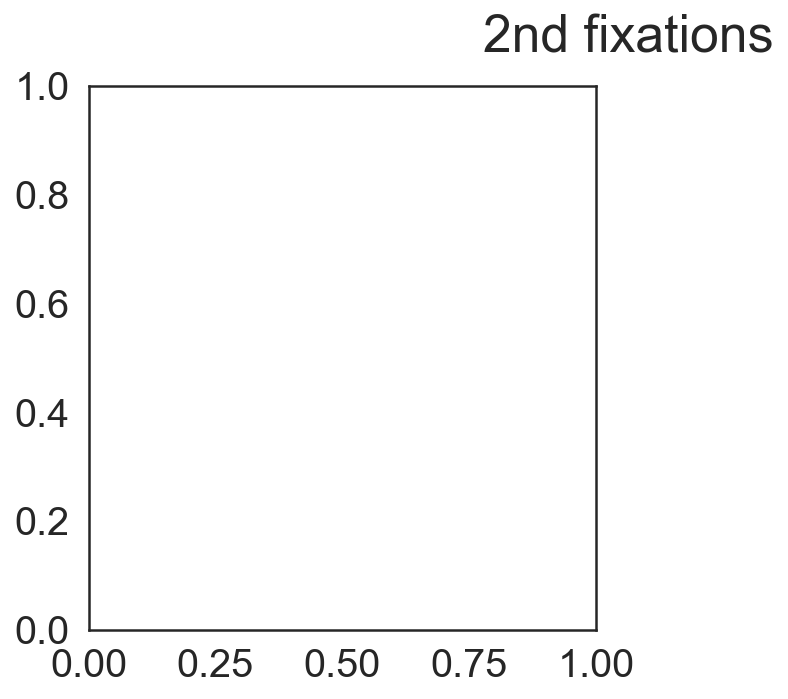

In [55]:
f = plt.figure(figsize=(10,5))
sns.set(style='white', font_scale=1.8)
plt.suptitle('2nd fixations')
my_pal = {0 :"b", 1 : "b"}

wspace1 = 0.4
left1 = 0.3 

plt.subplot(121)
print('Most')
all_arr = [low_Lik_2fixTime,
          high_Lik_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='2nd Fixation duration [ms]')
plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
add_star_ind(low_Lik_2fixTime, high_Lik_2fixTime)
#plt.ylim(0, 5)

plt.subplots_adjust(left=0, wspace=wspace1)

plt.subplot(122)

my_pal = {0 :"r", 1 : "r"}

print('Fewest')
all_arr = [low_Dis_2fixTime,
          high_Dis_2fixTime]
bplot = sns.violinplot(data=all_arr , palette=my_pal).set( ylabel='2nd Fixation duration[ms]')
plt.xticks([0, 1,], ['Low', 'High'])
#plt.tick_params( axis='y', which='both',bottom=False,top=False,labelbottom=False) 

add_star_ind(low_Dis_2fixTime, high_Dis_2fixTime)

patch1 = mpatches.Patch(facecolor='#4F6A9A',hatch=r'', label='Most')
patch2 = mpatches.Patch(facecolor='#AC5255',hatch=r'', label='Fewest')
leg = plt.legend(handles=[patch1,patch2],fontsize=18,loc = "upper right",frameon = False)

sns.despine()


## Last fixation results

In [56]:

# Recall that the fixation areas were defined
  ## 1 : Left
  ## 2 : Right


## ---  FOR fewest
data_expD['LastFixChosen'] = np.where(((data_expD['LastFixation'] == 1 ) & (data_expD['Choice'] == 0)) | ((data_expD['LastFixation'] == 2 ) & (data_expD['Choice'] == 1)), 1 , 0)

## ---  FOR most
data_expL['LastFixChosen'] = np.where(((data_expL['LastFixation'] == 1 ) & (data_expL['Choice'] == 0)) | ((data_expL['LastFixation'] == 2 ) & (data_expL['Choice'] == 1)), 1 , 0)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Define the last fixated item as reference for DVal


In [57]:
# for less
Dval_lastFix = []
for i in range(len(data_expD)):
        if (data_expD.LastFixation.values[i]== 2 ): # if last fixations goes to the right option keep DVal
            Dval_lastFix.append(data_expD.DVal.values[i])
        else:
            Dval_lastFix.append(-data_expD.DVal.values[i])

data_expD["DVal_LastFix"] = Dval_lastFix

# for most
Dval_lastFix = []
for i in range(len(data_expL)):
        if (data_expL.LastFixation.values[i]== 2 ): # if last fixations goes to the right option keep DVal
            Dval_lastFix.append(data_expL.DVal.values[i])
        else:
            Dval_lastFix.append(-data_expL.DVal.values[i])

data_expL["DVal_LastFix"] = Dval_lastFix

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###  Z-score

In [58]:
#Z-scored
data_expD['zDVal_LastFix'] = z_score1(data_expD,'Part',"DVal_LastFix")
data_expL['zDVal_LastFix'] = z_score1(data_expL,'Part',"DVal_LastFix")

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pra

Low measure:logit coef = [[0.61879256]] ; Intercept:  [1.98846238]
high measure:logit coef = [[-0.62968976]] ; Intercept:  [2.00740214]


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


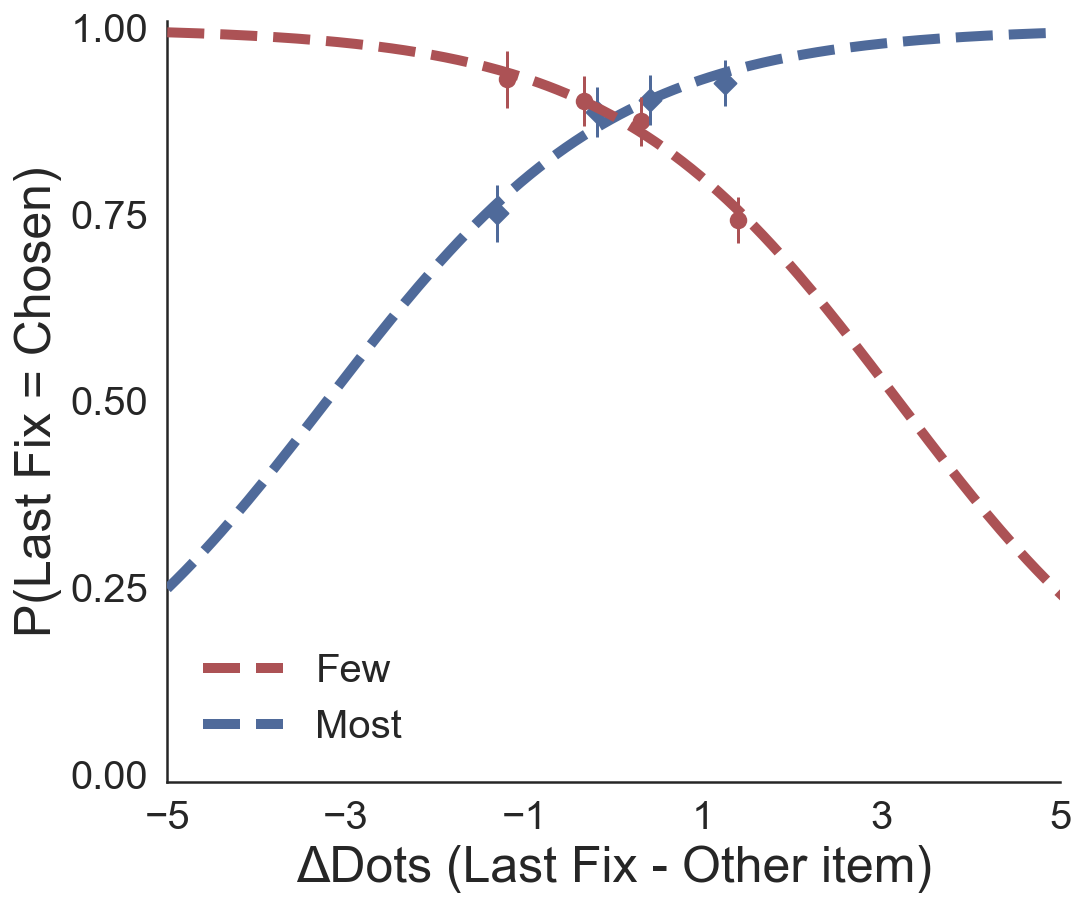

In [59]:
logisticplot_like_dislike (data_expL,data_expD,'Most','Few', xaxis='zDVal_LastFix', yaxis='LastFixChosen', ylab='P(Last Fix = Chosen)', xlab='ΔDots (Last Fix - Other item)', modlowcol='#4F6A9A',modhighcol='#AC5255', parvar='Part')

<a id='reg'></a>
# Regression Analysis
-------------------------------------
 

## Loading data in R

In [60]:
data_exp11.columns

Index(['index', 'Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LVal', 'RVal',
       'Choice', 'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT', 'LDwellTime',
       'RDwellTime', 'GSF', 'LastFixat', 'DVal', 'zDVal', 'AbsDVal',
       'zAbsDVal', 'zConf', 'zRT', 'TotVal', 'ChosenVal', 'UnchosenVal',
       'Correct', 'zTotVal', 'zChosenVal', 'zUnchosenVal', 'zGSF', 'zDDT',
       'zAbsDDT', 'zValR', 'zValL', 'ConfSplit', 'GSFSplit', 'DDTSplit',
       'BaseCode', 'High', 'Low', 'zRVal', 'zLVal', 'AbsDDT', 'zHighVal',
       'zLowVal', 'HighValPos', 'LowValPos', 'index', '1stFixation',
       '1stFixationTime', 'LastFixation', 'LastFixationTime', 'firstFixValue',
       'lastFixValue', 'fixatNum', 'middleFixNum', 'mostPopularFix',
       'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
       'middleFixTime', 'middleFixTimeAvg', 'TotalTime', 'midfix_Ltime',
       'midfix_Rtime', 'midfix_ddt', 'midfix_avgLtime', 'midfix_avgRtime',
       'second_fix_time', 'second_fix_id', 'LGaze

In [61]:
data_exp11.head()

,index,Unnamed: 0,Part,TrialN,PairID,LVal,RVal,Choice,RT,Conf,...,zHValGazePC,zLValGazePC,ChosenGazePC,UnchosenGazePC,zChosenGazePC,zUnchosenGazePC,zMidfix_ddt,zmiddleFixTimeAvg,HValAvgGazePC,LValAvgGazePC
0,0,0,1,1,49,110,131,0,4261.735,74,...,-0.283502,0.283502,0.560506,0.439494,-0.771459,-0.918108,0.491173,1.459309,799.0,1019.0
1,1,1,1,2,13,47,50,1,3559.258,54,...,-1.078244,1.078244,0.700375,0.700375,0.559557,0.756346,-0.055631,1.244214,640.0,748.0
2,2,2,1,3,16,50,44,1,3754.464,64,...,0.908174,-0.908174,0.649219,0.649219,0.072755,0.428009,0.215142,0.796627,707.0,764.0
3,3,3,1,4,7,57,50,0,2431.751,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.802349,NaN,NaN
4,4,4,1,5,18,42,50,0,2199.342,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.802349,NaN,NaN


In [62]:
%R -i data_exp11 #-i fixation_timeline_R

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [63]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

In [64]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp11[ which(data_exp11$Block=='1'), ]
data_exp1_DisLike <- data_exp11[ which(data_exp11$Block=='2'), ]

<a id='regCond'></a>
# Regressions per Condition (Like/Dislike)


[1] "Like BIC:"
[1] 2421.042
[1] "DisLike BIC:"
[1] 2534.733


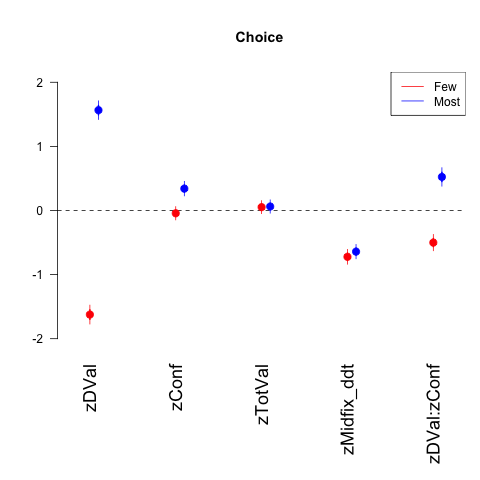

In [65]:
%%R

title_plot = "Choice "

ModelChoiceL_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zMidfix_ddt  , data=data_exp1_Like,  family=binomial(link="logit") )
ModelChoiceD_1 <- glm(Choice ~ zDVal + zConf + zTotVal + zDVal:zConf + zMidfix_ddt , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

[1] "Like BIC:"
[1] 10566.21
[1] "DisLike BIC:"
[1] 10658.95


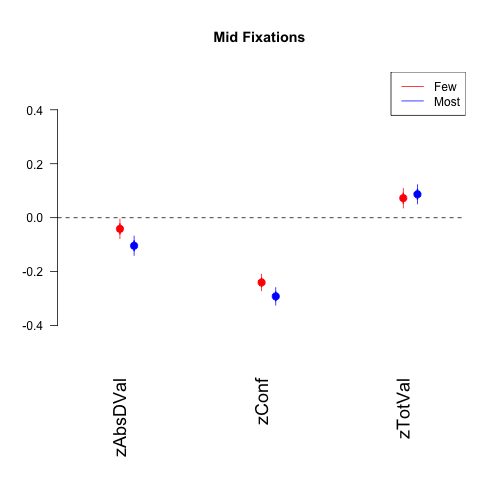

In [66]:
%%R

title_plot = "Mid Fixations "

ModelChoiceL_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf + zTotVal , data=data_exp1_Like )
ModelChoiceD_1 <- glm(zmiddleFixTimeAvg ~ zAbsDVal + zConf +  zTotVal , data=data_exp1_DisLike)

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-.5, .5) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Few", "Most"),col=c("red", "blue"), lty=1:1, cex=1)

## --[END]--

------------------------------------

<a id='ImpPkg'></a>
# 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [3]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [4]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1),duplicates= 'drop')

    return qvalues

### Full simple logistic graph

In [5]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [6]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [7]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [8]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [9]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [11]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [12]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [13]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4)       

    fig.text(0.5, 0.0, xlab, ha='center')
    fig.text(0.0, 0.5, ylab, va='center', rotation='vertical')
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [14]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [15]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    
    plt.show()


In [16]:
def ttestsPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [17]:
def ttestsBarPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))
    
    plt.bar( [1] ,  [mean(data1)] , color = c1, zorder = 0)
    plt.bar( [2] ,  [mean(data2)] , color = c2, zorder = 0)
    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
                    
    plt.scatter([1]*len(data1)+jittr, data1, c= '#000000', alpha=0.5,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= '#000000', alpha=0.5,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [18]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()

In [19]:
def logisticplot_like_dislike_bins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()



    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1,label=modlow)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2,label=modhigh)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
  #  sub.set_xticks((-5,-3,-1,1,3,5))
  #  sub.set_yticks((0,0.25,0.5,0.75,1))
  #  sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=8, prop={'size':20})
    sns.despine()

In [20]:
def logisticplot_like_dislike_onlyOne (data1,modlow, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    

    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
        
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False,)
    sns.despine()

In [21]:
def logisticplot_like_dislike_plotAndbins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False)
    sns.despine()

In [22]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='--')
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='--')

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=25)
    sub.set_xlabel(xlab, fontsize=25)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()